

*  Lior Shaposhnikov 207545237
*  Amit Shakarchy 313278889





Notebook link: https://colab.research.google.com/drive/1GhihLwDkhsI_NZFZiUR4Fqa5gKD8JJqk?usp=sharing

Statements Document: https://docs.google.com/document/d/13EkG6D7aR40ouu7KKWuog6Bq5P0EUPv7d5_J21gIQMo/edit?usp=sharing

Datasets: https://drive.google.com/drive/folders/1T8myoS4Jp5M1YzWEJBB1JMWA4LXso1aQ?usp=sharing


#   License

MIT License

Copyright (c) 2022 Wok

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

#**Exploration of the Airbnb Housing Market**

In this project, our main focus in on the exploration of the Airbnb housing market and its impact on the long-term rental market. We will explore the Airbnb market, try to answer a few interesting questions, and compare the long term and the short term rental markets.

We will use several data sources, but the main ones are the following:


*   [Airbnb Listings](https://public.opendatasoft.com/explore/dataset/airbnb-listings/information/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D)- The dataset contains publicly available information about how Airbnb is being used in cities around the world.
*   [Zillow Rent List Price ](https://data.world/datasets/rentals)-  The dataset contains median rental apartment prices in different locations in the US, divided into areas, number of apartment beds and months.

In some of the analyses, we will be using different versions of the same data- to gain an update data on a single city, for example.  


## Installations & Data Introduction

In [ ]:
! pip install turicreate
! pip install kaggle 
# ! pip install spaCy
! pip install afinn
! pip install geopandas
! pip install plotly_express
! pip install pycountry

In [ ]:
!pip install pandas --upgrade

In [ ]:
! rm -rf ./datasets

from google.colab import drive
import zipfile
from google.colab import files
import pandas as pd
import numpy as np
import turicreate as tc
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import glob
import turicreate.aggregate as agg

%matplotlib inline

drive.mount('/content/drive')

databases_folder = "/content/drive/Shareddrives/Project-bigData/Databases"
airbnb_csv = "/content/drive/Shareddrives/Project-bigData/Databases/Airbnb/airbnb-listings.csv"
geonames_cities_csv = "/content/drive/Shareddrives/Project-bigData/Databases/Geonames/geonames-all-cities-with-a-population-1000.csv"
us_cities_csv = "/content/drive/Shareddrives/Project-bigData/Databases/uscities/uscities.csv"

airbnb_geojson = "/content/drive/Shareddrives/Project-bigData/Databases/Airbnb/airbnb-listings.geojson"
zillow_dataset_dir = "/content/drive/Shareddrives/Project-bigData/Databases/Zillow/extracted"

new_york_rental_listings = "/content/drive/Shareddrives/Project-bigData/Databases/new york rental listings/E1_rentalInventory_All.csv"
new_york_rental_listings_airbnb = "/content/drive/Shareddrives/Project-bigData/Databases/Airbnb/NY/listings_nyc_2009-2018.csv"


In [ ]:
import geopandas as gpd

# load data in geopandas format, then conver it to turicreate SFrame 
def load_sframe(airbnb_geojson):
  data_airbnb_geojson = gpd.read_file(airbnb_geojson)
  df_airbnb = pd.DataFrame(data_airbnb_geojson)
  sf_airbnb = tc.SFrame(df_airbnb.drop(columns="geometry"))
  return sf_airbnb

sf_airbnb = load_sframe(airbnb_geojson)

In [ ]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

## How Airbnb Market Rules the Housing Market?
In this section, we wish to explore how Airbnb rules the housing market around the world. We will try to answer some questions, such as how many apartments are rented out to tourists instead of long-term residents? How common is the phenomenon of hosts running short-term rental businesses with multiple listings?
Moreover, we will try to compare Airbnb's growth to the growth of the long-term rent market.

###Airbnb's growth around the world
First, let's visualuize the growth of Airbnb around the globe. The following visualizations present the number airbnb listings (short-term apartments) added each year to the Airbnb market.

Groupping the Airbnb dataset by City, Country & Year to count the 
amount of apartments that were added each year to a single city

In [ ]:
import turicreate.aggregate as agg

# get needed columns: Country, City, Host-since
sf_airbnb_evolvment = sf_airbnb[["city", "country", "host_since"]]

# cities and countries to lower-case
sf_airbnb_evolvment["city"] = sf_airbnb_evolvment["city"].apply(lambda x: x.lower())
sf_airbnb_evolvment["country"] = sf_airbnb_evolvment["country"].apply(lambda x: x.lower())

# extract month and year from Host-since
sf_airbnb_evolvment["year_month_host"] = sf_airbnb_evolvment["host_since"].apply(lambda x: " ".join(x.split('-')[0:2]))

# aggregate by city & year
sf_airbnb_grouped_by_city_and_year = sf_airbnb_evolvment.groupby(key_column_names=['city', 'country', 'year_month_host'],operations={'count': agg.COUNT()})
sf_airbnb_grouped_by_city_and_year["year"] = sf_airbnb_grouped_by_city_and_year["year_month_host"].apply(lambda x: x.split(' ')[0])


Next, use pycountry to get the countries' location on the map

In [ ]:
import pycountry
def get_country_location(name):
    if name == 'Czech Republic':
        return 'CZE'
    if name == 'Russia':
        return 'RUS'

    try:
        return pycountry.countries.get(name=name).alpha_3
    except:
        return None
sf_airbnb_grouped_by_city_and_year['country_loc'] = sf_airbnb_grouped_by_city_and_year["country"].apply(lambda c:get_country_location(c) )
# clean the un-found countries
display_by_country_df = sf_airbnb_grouped_by_city_and_year[sf_airbnb_grouped_by_city_and_year['country_loc']!=None].to_dataframe()
display_by_country_df = display_by_country_df.dropna()

# sort by year
display_by_country_df = display_by_country_df.sort_values("year")
display_by_country_df["cumsum_count"] = display_by_country_df['count'].cumsum()
display_by_country_df

,city,country,year_month_host,count,year,country_loc,cumsum_count
4027,chicago,united states,2008 08,1,2008,USA,1
2281,chicago,united states,2008 10,1,2008,USA,2
6103,wien,austria,2008 12,1,2008,AUT,3
593,new york,united states,2008 09,1,2008,USA,4
3685,toronto,canada,2008 08,1,2008,CAN,5
...,...,...,...,...,...,...,...
1073,surry hills,australia,2017 03,1,2017,AUS,19733
3578,马德里,spain,2017 03,2,2017,ESP,19735
5781,austin,united states,2017 02,8,2017,USA,19743
46,alcúdia,spain,2017 01,1,2017,ESP,19744


In [ ]:
px.scatter_geo(display_by_country_df, locations="country_loc", hover_name="country", size="cumsum_count", animation_frame="year", projection="natural earth",
               title="number of new Airbnb listings for each year, worldwide")

(How cool is that !? 🆒)

From the worldwide perspective we can see that Airbnb is most common in europe and in USA. Let's look a bit closer on europe.

In [ ]:
px.scatter_geo(display_by_country_df, locations="country_loc", hover_name="country", size="cumsum_count", animation_frame="year", projection="natural earth", scope="europe",
               title="number of new Airbnb listings for each year in europe")

To understand the tipical locations of Airbnb apartments, we will examine the Airbnb listings' number in cities instead of countries.
We are using the [Geonames dataset](https://public.opendatasoft.com/explore/dataset/geonames-all-cities-with-a-population-1000/export/?disjunctive.cou_name_en&sort=name&location=6,40.91351,3.28491&basemap=jawg.light), that holds geolocation coordinates for cities around the world.

In [ ]:
def get_city_location(city_name, country_name):
    try:
        return sf_geonames_cities[(sf_geonames_cities["Country name EN"]==country_name.lower()) & (sf_geonames_cities["ASCII Name"]==city_name.lower())]["Coordinates"][0]
    except:
        return None

# load cities & coordinates dataset
sf_geonames_cities = tc.SFrame.read_csv(geonames_cities_csv,delimiter=';')
sf_geonames_cities = sf_geonames_cities[["Name", "ASCII Name","Country name EN", "Population", "Coordinates" ]]
sf_geonames_cities["ASCII Name"] = sf_geonames_cities["ASCII Name"].apply(lambda c: c.lower())
sf_geonames_cities["Country name EN"] = sf_geonames_cities["Country name EN"].apply(lambda c: c.lower())

sf_airbnb_grouped_by_city_and_year['Coordinates'] = sf_airbnb_grouped_by_city_and_year.apply(lambda c: get_city_location(c["city"], c["country"]))
display_by_city_df = sf_airbnb_grouped_by_city_and_year.dropna(['Coordinates']).to_dataframe()

display_by_city_df['lat'] = display_by_city_df['Coordinates'].apply(lambda x: x.split(",")[0])
display_by_city_df['lon'] = display_by_city_df['Coordinates'].apply(lambda x: x.split(",")[1])
display_by_city_df = display_by_city_df.dropna()
display_by_city_df = display_by_city_df.sort_values("year")
display_by_city_df["cumsum_count"] = display_by_city_df['count'].cumsum()

px.scatter_geo(display_by_city_df, lon="lon", lat="lat", hover_name="city", size="cumsum_count", animation_frame="year", projection="natural earth",scope="europe",
               title="number of new Airbnb listing for each year - by city")

As we can see, the most popular locations for Airbnb aprtments are big tourist cities, such as Paris, Berlin, and Amsterdam- which makes sense. 

Let's see what is going on in the US:

In [ ]:
# create accumulated number of new Airbnb apartments over the years
def get_acumulative_number_of_apartments(city_name, country_name, sf_airbnb_grouped_by_city_and_year):
  city_df = sf_airbnb_grouped_by_city_and_year[(sf_airbnb_grouped_by_city_and_year["city"]==city_name) 
                                      & (sf_airbnb_grouped_by_city_and_year["country"]==country_name)].to_dataframe()
  city_df = city_df.sort_values("year")                          
  city_df["cumsum_count"] = city_df['count'].cumsum()
  return city_df

# get US's accumulated growth over thr years
country_name = "united states"
accumulated_df = pd.DataFrame()
for city_name in sf_airbnb_grouped_by_city_and_year[sf_airbnb_grouped_by_city_and_year["country"]==country_name]["city"].unique():
  city_df = get_acumulative_number_of_apartments(city_name, country_name, sf_airbnb_grouped_by_city_and_year)
  accumulated_df = pd.concat([accumulated_df, city_df], axis=0)

df_us_cities = pd.read_csv(us_cities_csv,delimiter=',')
df_us_cities["city"] = df_us_cities["city"].apply(lambda c: c.lower())

def get_coordinate(city_name, lon_lat):
  try:
    return df_us_cities[df_us_cities["city"]==city_name][lon_lat].iloc[0]
  except: 
    return None   
    
accumulated_df['lat'] = accumulated_df["city"].apply(lambda c:get_coordinate(c, "lat"))
accumulated_df['lon'] = accumulated_df["city"].apply(lambda c:get_coordinate(c, "lng"))
accumulated_df = accumulated_df.dropna()
accumulated_df = accumulated_df.sort_values("year")

In [ ]:
px.scatter_geo(accumulated_df, lon="lon", lat="lat", hover_name="city", size="cumsum_count", animation_frame="year", projection="natural earth",locationmode='USA-states',scope="north america",
               title="number of Airbnb listing - by city")

We can see that As in eurpoe, Airbnb apartments are most common in tourist eares- such as LA and NYC.

###Long-term rental vs Airbnb's growth- NYC

We will now try to visualize the trend of the growth in the airbnb market, and compare it to the growth of long-term rental apartments market. We will take NYC as an example for these visualizations.

We will calculate the growth in 2 ways:
1.   By summing the number of new rental apartments in the dataset for each year, and calculating the percentage change between the years.
2.   By summing the number of reviews received from gests for each year, and calculating the percentage change between the years. We will do so only for the Airbnb listings, of course.

The source for the long-term data can be found [here](https://streeteasy.com/blog/download-data/). The Total Rental Inventory dataset holds the number of rental listings available on StreetEasy at any point during the month/quarter/year, from 2010 untill 2018.

In [ ]:
nyc_df_airbnb = tc.SFrame.read_csv(new_york_rental_listings_airbnb,delimiter=';')
nyc_df_airbnb["year_month"] = nyc_df_airbnb["Host Since"].apply(lambda x: "-".join(x.split('-')[0:2]))

# calculate growth - new listings
nyc_df_airbnb_count = nyc_df_airbnb.groupby(key_column_names=['year_month'],operations={'count': agg.COUNT()}).to_dataframe()
nyc_df_airbnb_count = nyc_df_airbnb_count.sort_values("year_month")
nyc_df_airbnb_count["cumsum"] =  nyc_df_airbnb_count["count"].cumsum()
nyc_df_airbnb_count["rent type"] = "short term rentals"
nyc_df_airbnb_count["growth"] = nyc_df_airbnb_count["cumsum"].pct_change()

# calculate growth - number of reviews
nyc_df_airbnb_reviews = nyc_df_airbnb.groupby(key_column_names=['year_month'],operations={"total number of reviews":agg.SUM("Number of Reviews")}).to_dataframe()
nyc_df_airbnb_reviews["cumsum_reviews"] =  nyc_df_airbnb_reviews["total number of reviews"].cumsum()
nyc_df_airbnb_reviews["rent type"] = "short term rentals- review growth"
nyc_df_airbnb_reviews["growth"] = nyc_df_airbnb_reviews["cumsum_reviews"].pct_change()
nyc_df_airbnb_reviews = nyc_df_airbnb_reviews.sort_values("year_month")

Finished parsing file /content/drive/Shareddrives/Project-bigData/Databases/Airbnb/NY/listings_nyc_2009-2018.csv

Parsing completed. Parsed 100 lines in 2.09871 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,int,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,int,str,str,str,str,str,str,int,str,str,str,str,int,int,str,str,str,str,str,str,str,int,str,str,str,str,float,float,str,str,int,float,int,int,str,str,int,int,int,int,int,int,int,int,int,int,str,str,int,int,int,int,str,int,str,str,int,int,int,int,int,int,int,str,str,str,int,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 14265 lines. Lines per second: 9731.35

Finished parsing file /content/drive/Shareddrives/Project-bigData/Databases/Airbnb/NY/listings_nyc_2009-2018.csv

Parsing completed. Parsed 19527 lines in 1.62135 secs.

In [ ]:
# calculate growth - number of rental listings
new_york_rental_df = pd.read_csv(new_york_rental_listings)
new_york_rental_df = new_york_rental_df.drop(columns=["Area", "Boro", "AreaType"])

sum_rental_apartments = pd.DataFrame()
sum_rental_apartments["sum"] = new_york_rental_df.sum()
sum_rental_apartments["year_month"] = sum_rental_apartments.index
sum_rental_apartments = sum_rental_apartments.sort_values("year_month")
sum_rental_apartments["cumsum"] = sum_rental_apartments["sum"].cumsum()
sum_rental_apartments["rent type"] = "long term rentals"
sum_rental_apartments["growth"] = sum_rental_apartments["cumsum"].pct_change()

In [ ]:
df_compare = pd.concat([nyc_df_airbnb_count,nyc_df_airbnb_reviews,sum_rental_apartments],axis=0)[["year_month", "growth", "rent type"]]
px.line(df_compare, x="year_month", y="growth", color='rent type', title="Growth of Airbnb market vs. Long Term Rent Market")

*  We would expect to see a certain amount of correlation between the short term 
rental's slopes: amount of listings (🟣) slope and reviews amount slope (🔴), under the assumption that an increase in the number of reviews represents the growth of the Airbnb's market. 
*  Comparing the long term rental market growth (🟢), and the Airbnb market growth (🟣,🔴) we can see that the growth of Airbnb is larger in 2011-2014ץ In these years, the Airbnb market thrived globaly.


###Airbnb as a short-term rental business
How common is the phenomenon of hosts running short-term rental business with multiple listings? To answer this question, we will use the combination of the host name + host about data as a unique identifier for a business owner, and see how many hosts run a business with multiple short-term rental apartments.

For example: host name & about

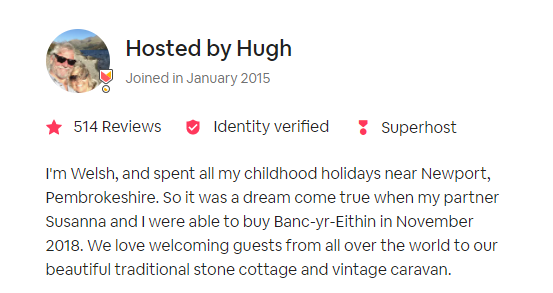

In [ ]:
import turicreate.aggregate as agg
import hashlib

# get needed columns: host_name, host_about
sf_airbnb_business = sf_airbnb[["city","country", "host_name", "host_about"]]

# cities and countries to lower-case
sf_airbnb_business["city"] = sf_airbnb_business["city"].apply(lambda x: x.lower())
sf_airbnb_business["country"] = sf_airbnb_business["country"].apply(lambda x: x.lower())
sf_airbnb_business["host_info_id"] = sf_airbnb_business.apply(lambda x: hashlib.md5((str(x["host_name"]) +str(x["host_about"])).encode("utf-8")).hexdigest())

# aggregate by host_name & host_about
sf_airbnb_grouped_host_name_about = sf_airbnb_business.groupby(key_column_names=["country","city", 'host_info_id'],operations={'count': agg.COUNT()})

# agregate by city
sf_airbnb_grouped_host_name_about_country = sf_airbnb_grouped_host_name_about.groupby(key_column_names=["country", "count"],operations={'mean': agg.MEAN("count"),
                                                                                                                                        'std': agg.STD("count")})
fig = px.box(sf_airbnb_grouped_host_name_about_country.to_dataframe(), x="country", y="mean", title="Average number of properties for a single host around the wolrd")

fig.show()

As we can see, small-scale short-term rental businesses are quite common. All of the above countries have an average of above 1.5 apartments per host. We can assume that running an Airbnb bussiness in France and UK might be easier in terms of national taxes and regulations, therfore in average a host holds up to 8/12 apartments.

## Short-term vs long-term prices in four states in US during last year

 

In this section, We will examine how Airbnb’s rental prices affect long-term rental apartments’ prices, comparing the data from the datasets mentioned above. Are the prices correlative?

We compared between Airbnb’s rental prices (short-term rental) to Zillow's rental prices (long-term rental). 
We focused on the US, comparing data in four states during the last year (March 2021 to January 2022). We used that time segment, since it is the only one to have all needed information for the analysis.
The Airbnb's datasets taken from [here](http://insideairbnb.com/get-the-data.html), the dataset that is used here is more specific than one used in the other sections.

We will dive in into our mission- comparing prices of the following states:

*   Florida
*   New York
*   Texas
*   North Carolina 


We chose these 4 central states to represent the US. for each state, we aggregate the data by year.

In [ ]:
# load datasets for each state
airbnb_NY_calender = "/content/drive/Shareddrives/Project-bigData/Databases/Airbnb/NY/calendar_21.csv"
airbnb_FL_calender = "/content/drive/Shareddrives/Project-bigData/Databases/Airbnb/FL/calendar_21.csv"
airbnb_NC_calender = "/content/drive/Shareddrives/Project-bigData/Databases/Airbnb/NC/calendar_21.csv"
airbnb_TX_calender = "/content/drive/Shareddrives/Project-bigData/Databases/Airbnb/TX/calendar_21.csv"

airbnb_NY = pd.read_csv(airbnb_NY_calender, encoding="UTF-8", warn_bad_lines=False, error_bad_lines=False)
airbnb_FL = pd.read_csv(airbnb_FL_calender, encoding="UTF-8", warn_bad_lines=False, error_bad_lines=False)
airbnb_NC = pd.read_csv(airbnb_NC_calender, encoding="UTF-8", warn_bad_lines=False, error_bad_lines=False)
airbnb_TX = pd.read_csv(airbnb_TX_calender, encoding="UTF-8", warn_bad_lines=False, error_bad_lines=False)

airbnb_NY["state"] = "NY"
airbnb_FL["state"] = "FL"
airbnb_NC["state"] = "NC"
airbnb_TX["state"] = "TX"

join_df_airbnb = pd.concat([airbnb_NY,airbnb_FL,airbnb_NC,airbnb_TX])


join_df_airbnb["state"] = join_df_airbnb["state"].astype(str)
join_df_airbnb["year_Scraped"] = join_df_airbnb["date"].apply(lambda x: x.split('-')[0]) #last_scraped
join_df_airbnb["month_Scraped"] = join_df_airbnb["date"].apply(lambda x: int(x.split('-')[1]))
join_df_airbnb["adjusted_price"] = join_df_airbnb["adjusted_price"].astype(str)

# convert dollar price $150.00 to number 150.00
def convert_to_price(price_in_dollars):
  try:
      return round(float(price_in_dollars[1:].replace(",","")))
  except:
      return None

join_df_airbnb["adjusted_price"] = join_df_airbnb["adjusted_price"].apply(lambda x: convert_to_price(x))

# here we calculated airbnb the mean price per month and state 
prices_per_state_usa_airbnb = join_df_airbnb.groupby(['state','year_Scraped','month_Scraped']).mean().reset_index()
prices_per_state_usa_airbnb["year_Scraped"] = prices_per_state_usa_airbnb["year_Scraped"].astype(int)
prices_per_state_usa_airbnb = prices_per_state_usa_airbnb.rename(columns={"adjusted_price":"Airbnb price"}, errors="raise")

# loading the zillow dataset 
zillow_prices_csv = "/content/drive/Shareddrives/Project-bigData/Databases/Zillow/updated_data/Metro_ZORI_AllHomesPlusMultifamily_Smoothed.csv"
zillow_data = pd.read_csv(zillow_prices_csv)

#preprocessing of dataset 
zillow_data = zillow_data.drop(columns=["SizeRank","RegionID"])
zillow_data =zillow_data.dropna()
zillow_data = zillow_data.melt(id_vars=["RegionName"], 
        var_name="Date", 
        value_name="Value")

zillow_data = zillow_data.dropna()

# extract region representation
zillow_data["RegionName"] = zillow_data["RegionName"].apply( lambda x: str(x.split(" ")[-1:][0] ))

# get year from date
zillow_data["year_Scraped"] = zillow_data["Date"].apply(lambda x: int(x.split('-')[0]))

#get mounth from year
zillow_data["month_Scraped"] = zillow_data["Date"].apply(lambda x: int(x.split('-')[1]))
# zillow_data["Zillow_price"] = zillow_data["Value"]

zillow_data = zillow_data.rename(columns={"Value":"Zillow_price"}, errors="raise")

# quarter calculation
zillow_data["quarter"] = zillow_data["month_Scraped"].apply(lambda x: (x-1)//3 + 1)

# filter relevant states 
region_filter = ["FL","NC","NY","TX"]
zillow_data = zillow_data[ zillow_data["RegionName"].isin(region_filter) ]

# calculate mean price for each region and date
zillow_data = zillow_data.groupby(['month_Scraped','year_Scraped',"RegionName"]).mean().reset_index()

# merge 2 datasets
merged_data = prices_per_state_usa_airbnb.merge(zillow_data,how='left', left_on=["year_Scraped", "month_Scraped","state"], right_on=["year_Scraped", "month_Scraped","RegionName"]
                                            ) [["state","year_Scraped","month_Scraped","Airbnb price","Zillow_price"]]
merged_data["time"] = merged_data["year_Scraped"].map(str) +"-"+merged_data["month_Scraped"].map(str)    
merged_data = merged_data.dropna()

# unstack and classify zillow and airbnb price
unstack_data_zillow = merged_data[["time","Zillow_price","state"]]
unstack_data_zillow = unstack_data_zillow.rename(columns={"Zillow_price":"price"}, errors="raise")
unstack_data_zillow["class"] = "Long-term rental"
unstack_data_airbnb = merged_data[["time","Airbnb price","state"]]
unstack_data_airbnb = unstack_data_airbnb.rename(columns={"Airbnb price":"price"}, errors="raise")
unstack_data_airbnb["class"] = "Short-term rental"
unstack_data = pd.concat([unstack_data_airbnb[["time","price","class","state"]], unstack_data_zillow[["time","price","class","state"]]])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


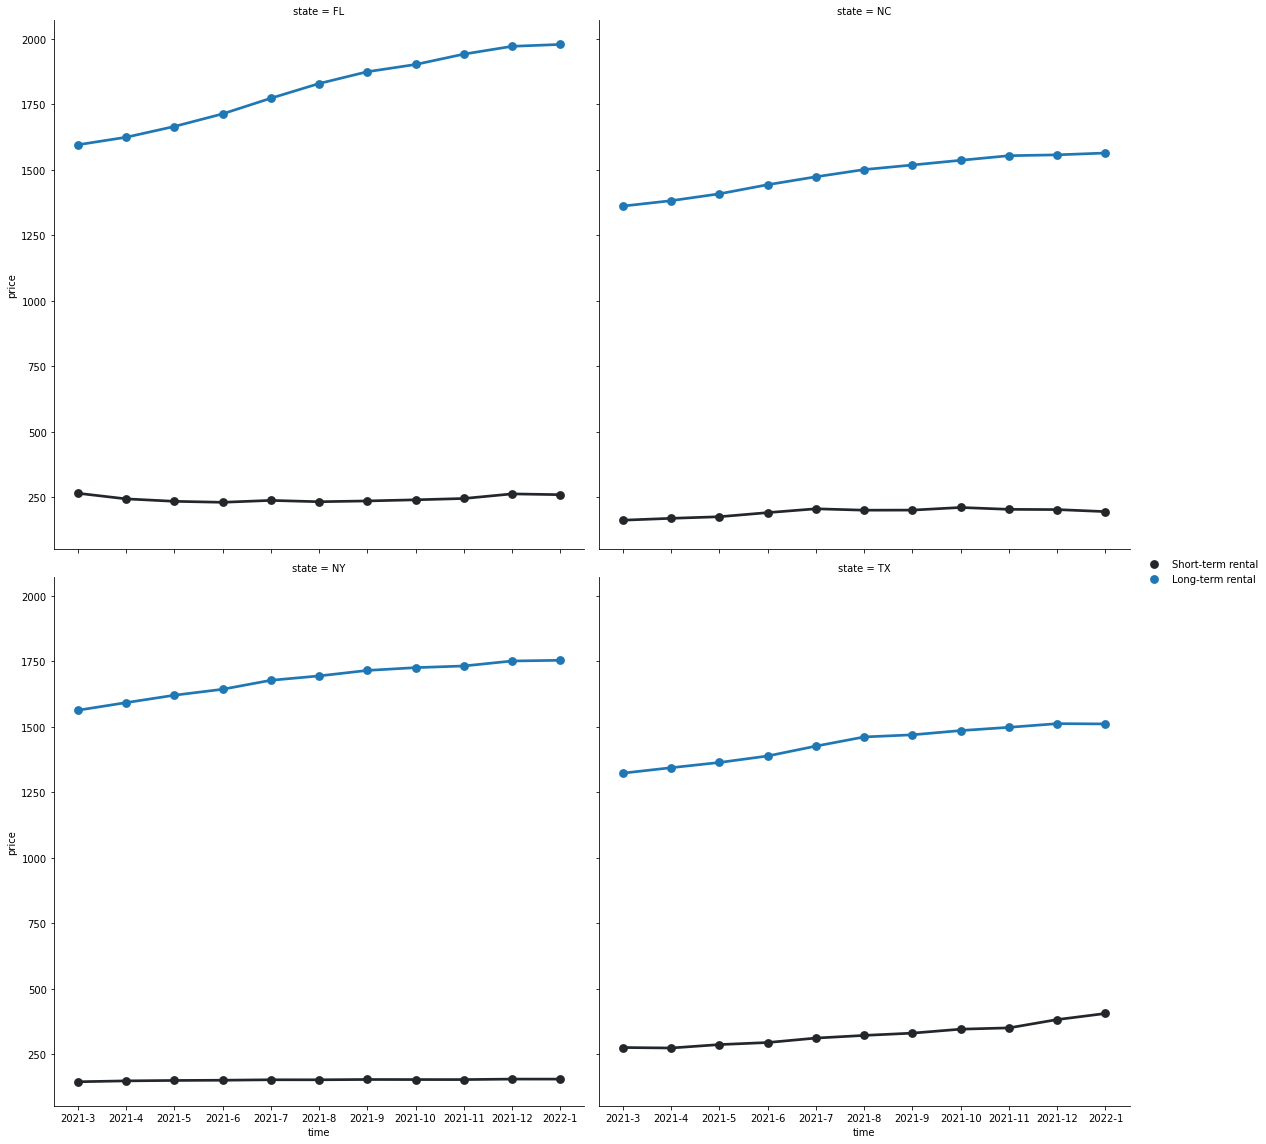

In [ ]:
# draw comparison graph for each state from 4 choosen
g = sns.FacetGrid(unstack_data, col="state", margin_titles=True, col_wrap=2, height=8)
g.map_dataframe(sns.pointplot, x="time", y="price", hue="class")
g.add_legend()

⚡ As we can see in Florida and North Carolina long-term rental prices increases over time, while short-term rental prices have minor changes. 

⚡ In Texas, we can see an increase in long-term prices and short-term rental prices as well. 

⚡ On the other hand, New York's short-term rental prices stay the same and the long-Term rental prices increase. 

The common to all graphs is that long-term prices increase over time, but we cannot see a correlation to the short-term rental prices.

##Price alternations for different aparment sizes

In this section, wish to see how price rate changes over time (for long-term rental) for different apartment sizes (ranges from 1-5 accomondates).
We will try to answer the following questions: 
1. Are price changes of the analysed states correlative?
2. Do price changes have the same affect on diffrent apartment sizes?

Again, the comparission was made for three states in US: North Corolina, Texas, and Florida. 

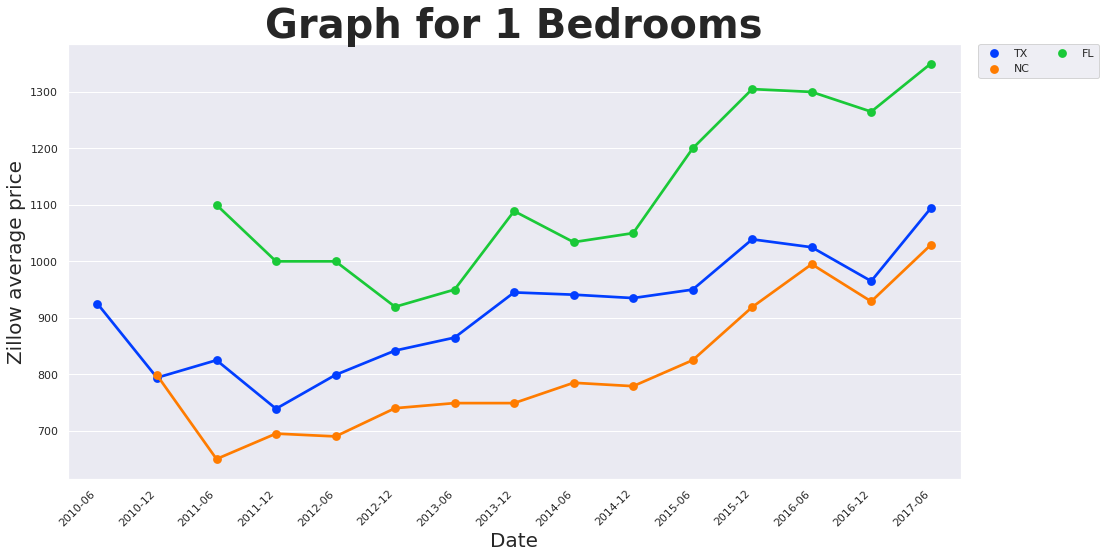

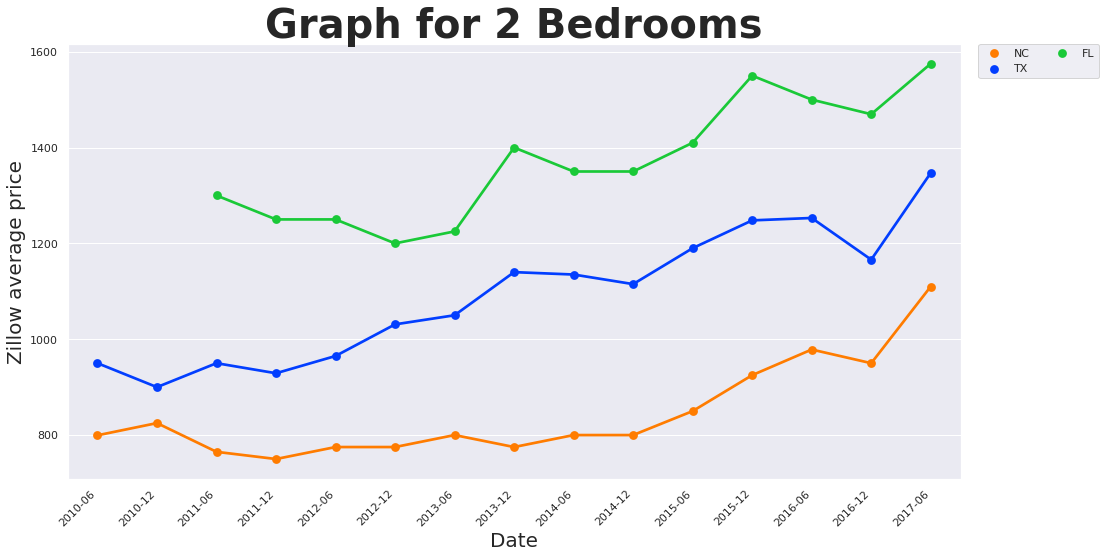

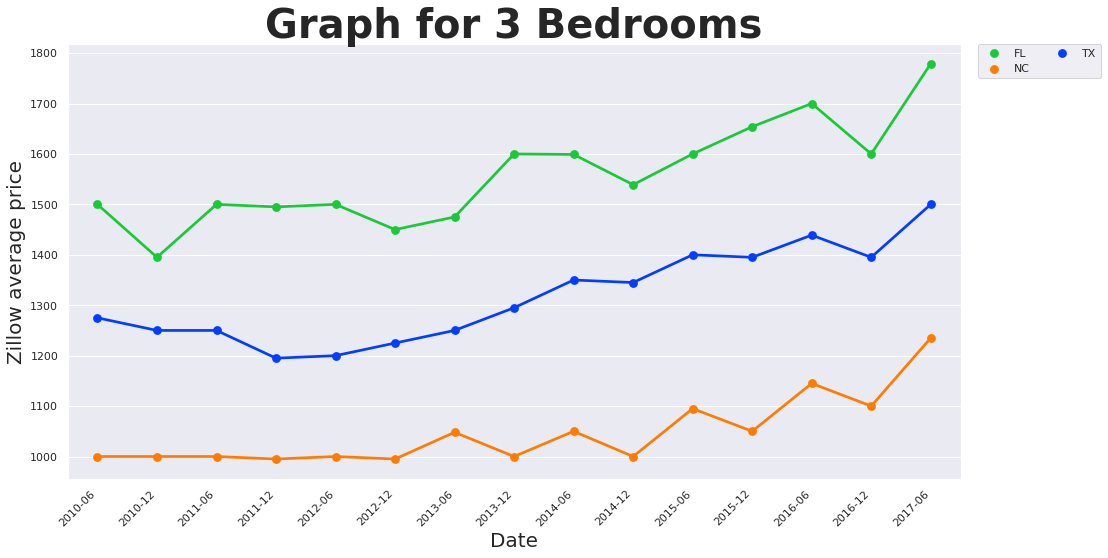

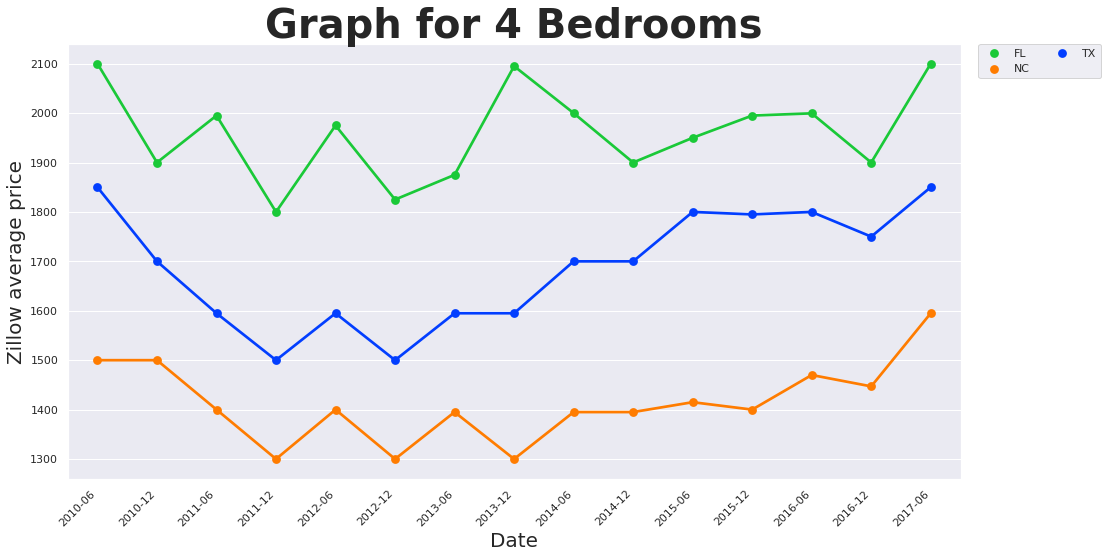

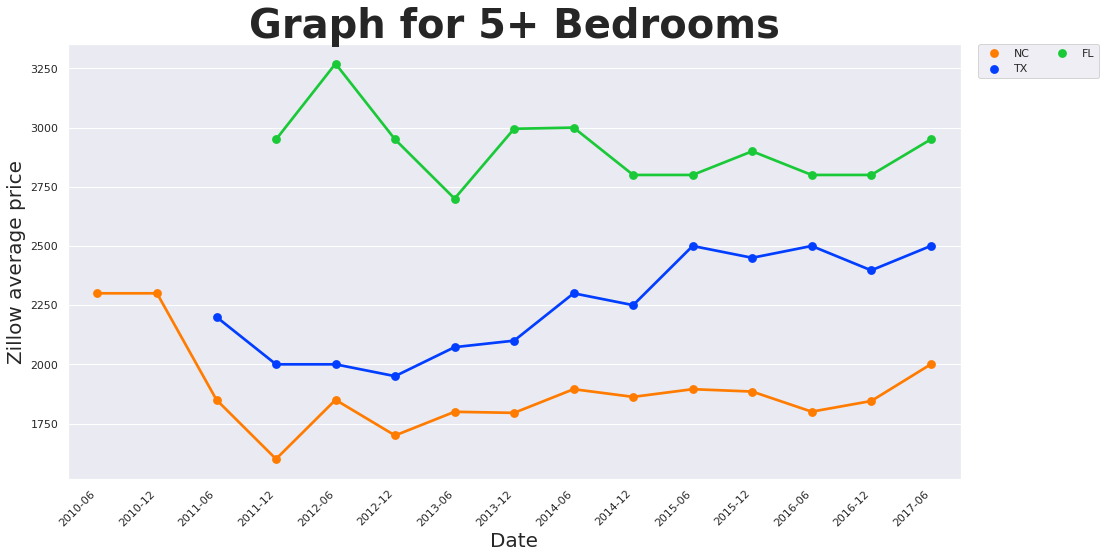

In [ ]:
# load data
zillow_one_rooms_csv = "/content/drive/Shareddrives/Project-bigData/Databases/Zillow/extracted/zillow-data-median-rent-list-price-1-bedroom/State_MedianRentalPrice_1Bedroom.csv"
zillow_two_rooms_csv = "/content/drive/Shareddrives/Project-bigData/Databases/Zillow/extracted/zillow-data-median-rent-list-price-2-bedroom/State_MedianRentalPrice_2Bedroom.csv"
zillow_three_rooms_csv = "/content/drive/Shareddrives/Project-bigData/Databases/Zillow/extracted/zillow-data-median-rent-list-price-3-bedroom/State_MedianRentalPrice_3Bedroom.csv"
zillow_four_rooms_csv = "/content/drive/Shareddrives/Project-bigData/Databases/Zillow/extracted/zillow-data-median-rent-list-price-4-bedroom/State_MedianRentalPrice_4Bedroom.csv"
zillow_more_than_five_rooms_csv = "/content/drive/Shareddrives/Project-bigData/Databases/Zillow/extracted/zillow-data-median-rent-list-price-5-bedroom/State_MedianRentalPrice_5BedroomOrMore.csv"
dataset_pathes = [zillow_one_rooms_csv,zillow_two_rooms_csv,zillow_three_rooms_csv,zillow_four_rooms_csv,zillow_more_than_five_rooms_csv]
zillow_data = pd.DataFrame()
index = 1
for csv_path in dataset_pathes: 
  zillow_df = pd.read_csv(csv_path)
  zillow_df["accommodates"] = index
  index = index + 1
  zillow_data = zillow_df.append(zillow_data)

# order data 
zillow_data = zillow_data.drop(columns=["SizeRank"])
zillow_data = zillow_data.melt(id_vars=["RegionName","accommodates"], 
        var_name="Date", 
        value_name="Value")

# data preprocessing
zillow_data = zillow_data.dropna()
zillow_data["RegionName"] = zillow_data["RegionName"].apply( lambda x: us_state_to_abbrev[x] )

# select relevant states
# filter relevant states 
region_filter = ["FL","NC","TX"]
zillow_data= zillow_data[zillow_data["RegionName"].isin(region_filter)]

# get year feature
zillow_data["year_Scraped"] = zillow_data["Date"].apply(lambda x: x.split('-')[0])

# get month feature
zillow_data["month_Scraped"] = zillow_data["Date"].apply(lambda x: x.split('-')[1])
zillow_data["Zillow_price"] = zillow_data["Value"]

zillow_data_sf = tc.SFrame(zillow_data)
# get data every half year 
zillow_data_filtered_sf = zillow_data_sf.filter_by(filter(lambda x : x == "12" or x=="06" , zillow_data_sf['month_Scraped']),"month_Scraped")
zillow_data_filtered_sf = zillow_data_filtered_sf.sort(['accommodates','year_Scraped','month_Scraped','RegionName']).to_dataframe()
zillow_data_filtered_sf["date"] = zillow_data_filtered_sf.year_Scraped.str.cat(zillow_data_filtered_sf.month_Scraped, sep='-')

unique = zillow_data_filtered_sf["RegionName"].unique()
palette = dict(zip(unique, sns.color_palette("bright",n_colors=len(unique))))
palette.update({"Total":"k"})

# draw graph for every apartment size
for accommodate_num in range(1,6,1):
    df_curr_accommode_number = zillow_data_filtered_sf[zillow_data_filtered_sf["accommodates"]==accommodate_num]
    sns.set(rc={'figure.figsize':(16,8)})
    ax = sns.pointplot(data=df_curr_accommode_number, x="date", y="Zillow_price", hue="RegionName", palette=palette) #size="records",  sizes=(50, 100),
    plt.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left', borderaxespad=0, ncol = 2)
    plt.xticks(
      rotation=45, 
      horizontalalignment='right',
      fontweight='light',
    )
    if accommodate_num == 5:
        ax.set_title("Graph for 5+ Bedrooms",fontsize=40,fontweight="bold")
    else:
        ax.set_title("Graph for "+ str(accommodate_num)+" Bedrooms",fontsize=40,fontweight="bold")
    ax.set_xlabel("Date",fontsize=20)
    ax.set_ylabel("Zillow average price",fontsize=20)
    plt.show()

⚡ As presented, we can see that prices gap between selected states stays over time. No matter the apartment size, Florida is more expensive for long-term rental then Texas and North carolina, while North carolina is the cheapest from the compared states.

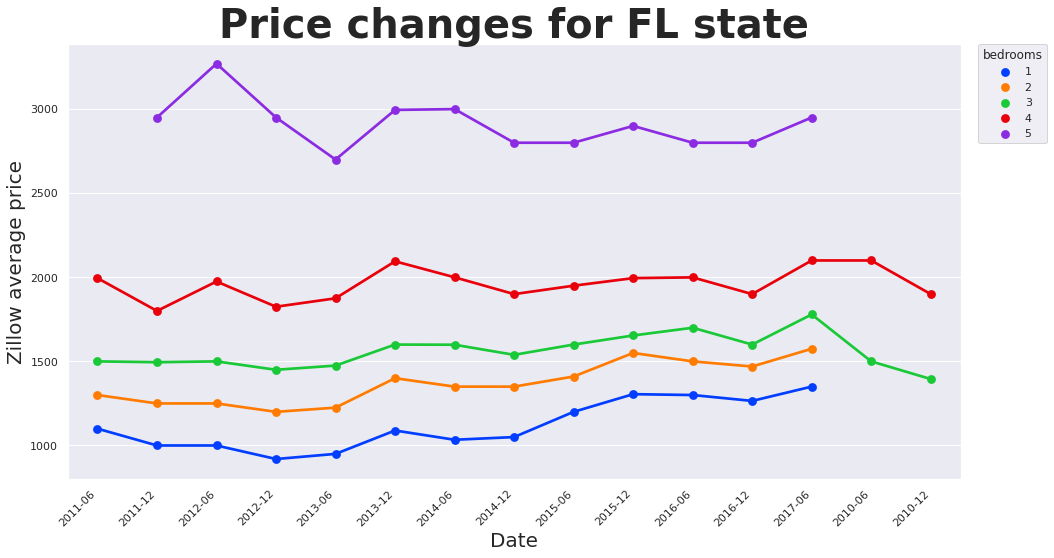

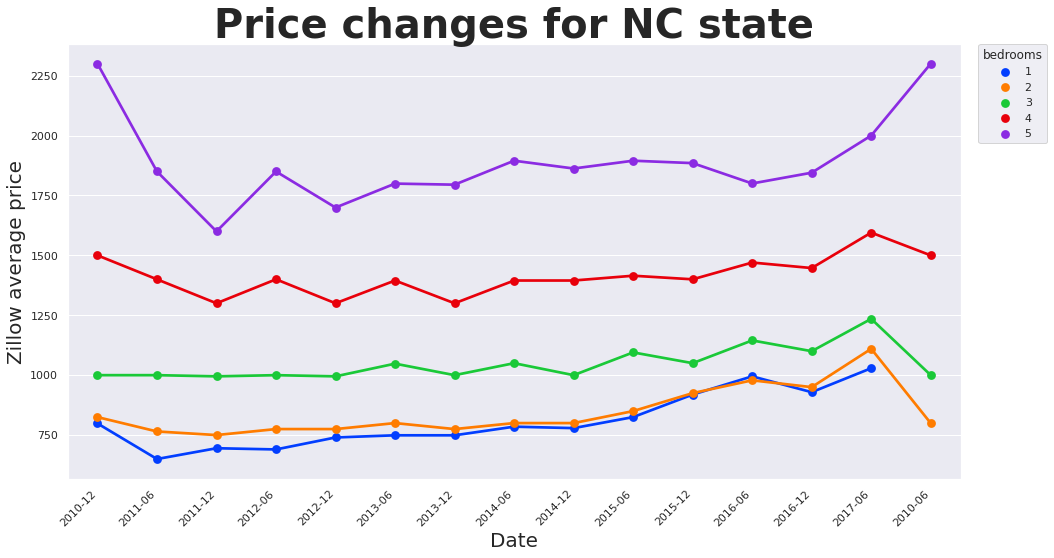

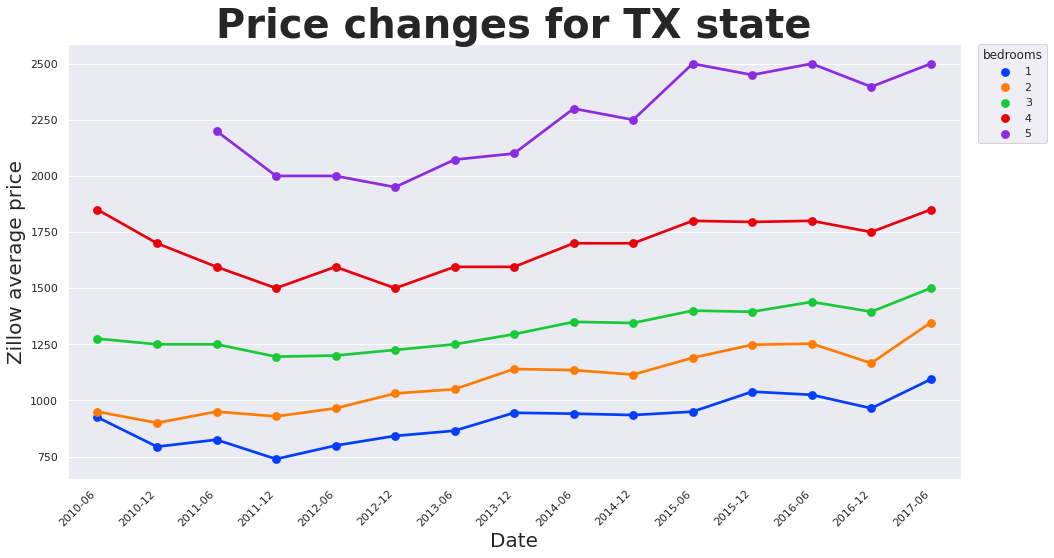

In [ ]:
unique = zillow_data_filtered_sf["accommodates"].unique()
palette = dict(zip(unique, sns.color_palette("bright",n_colors=len(unique))))
palette.update({"Total":"k"})

# draw graph for every apartment size
for state in region_filter:
    df_curr_accommode_number = zillow_data_filtered_sf[zillow_data_filtered_sf["RegionName"]==state]
    sns.set(rc={'figure.figsize':(16,8)})
    ax = sns.pointplot(data=df_curr_accommode_number, x="date", y="Zillow_price", hue="accommodates", palette=palette) #size="records",  sizes=(50, 100),
    plt.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left', borderaxespad=0, ncol = 1, title='bedrooms')
    plt.xticks(
      rotation=45, 
      horizontalalignment='right',
      fontweight='light',
    )

    ax.set_title("Price changes for "+str(state)+" state",fontsize=40,fontweight="bold")
    ax.set_xlabel("Date",fontsize=20)
    ax.set_ylabel("Zillow average price",fontsize=20)
    plt.show()

⚡ We can see that for Texas and Florida there is a price difference between diffrent apartment sizes. While in North Carolina, there is interesting phenomenon, there is almost no difference between prices for 1 or 2 bedrooms apartments.

## How does a listing's description affects the guests' reviews?

A smart host will always praise it's Airbnb property, in order to market it in the best possible way 🤑. But can a customer trust a property's description? In order to examine the relation between a property's description and its actual quality (in terms of the goodnes of the property), we will build a classifier to predict a property scoring based on its description. To do so, we will use the summary of the property and the neighborhood overview seperately to see wether one of them can predict the review's property.

In [ ]:
sf_airbnb["review_scores_rating"] = sf_airbnb["Review Scores Rating"]
sf_airbnb["summary"] = sf_airbnb["Summary"]
sf_airbnb["neighborhood_overview"] = sf_airbnb["Neighborhood Overview"]

In [ ]:
sf_reviews_appartment_summary = sf_airbnb[["review_scores_rating", "summary"]] # for the apartment's summary
sf_reviews_appartment_erea = sf_airbnb[["review_scores_rating", "neighborhood_overview"]] # for the erea overviewNeighborhood Overview

print("Property's summary: \n", sf_reviews_appartment_summary["summary"][25])
print("Property's Neighborhood Overview: \n",sf_reviews_appartment_erea["neighborhood_overview"][25])

Property's summary: 
 This is a warm, perfect and centrally located apartment. In waking distance there is restaurants, cafés, yoga centers, DKs largest football stadium, a park were you can grill, play games or just hangout, and lakes where you can do your morning run.
Property's Neighborhood Overview: 
 The apartment is located in one of the nicest spots in Copenhagen. The street is very quiet but still offers a variety of café, restaurants and antique shops. Its one minute from the lakes, which is a wonderful place to take an evening stroll or a morning breakfast or brunch.


We can see that for the example above, the description is quite positive. Let's check the distribution of the review scores rating- the weighted score of all reviews.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)



+--------------------+-------------------+----------+
|        item        |       value       | is exact |
+--------------------+-------------------+----------+
|       Length       |       195437      |   Yes    |
|        Min         |        20.0       |   Yes    |
|        Max         |       100.0       |   Yes    |
|        Mean        | 93.00846856191414 |   Yes    |
|        Sum         |     13629647.0    |   Yes    |
|      Variance      |  70.5414726871107 |   Yes    |
| Standard Deviation | 8.398897111354009 |   Yes    |
|  # Missing Values  |       48895       |   Yes    |
|  # unique values   |         63        |    No    |
+--------------------+-------------------+----------+

Most frequent items:
+-------+-------+
| value | count |
+-------+-------+
|  100  | 37629 |
|   93  | 10005 |
|   96  |  9553 |
|   95  |  9237 |
|   97  |  9072 |
|   90  |  9069 |
|   98  |  9001 |
|   80  |  7849 |
|   94  |  6476 |
|   92  |  5534 |
+-------+-------+

Quantiles: 
+------+--

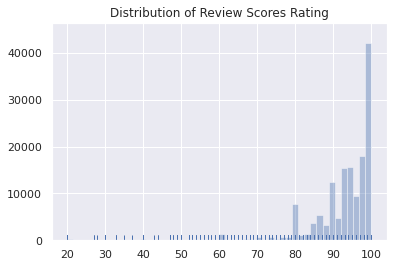

In [ ]:
import seaborn as sns
sns.set()
sns.distplot(x=sf_reviews_appartment_summary['review_scores_rating'], kde=False, rug=True).set_title("Distribution of Review Scores Rating")
sf_reviews_appartment_summary['review_scores_rating'].summary()

Most of the reviews are good. Let's devide the scores into 3 bins:

*   "Good" review, for scores range between 70-100 😃
*   "Fine" review, for scores range between 50-70 🙂
*   "Bad" review, for score range between 0-50 😞

In [ ]:
def rating2sentiment(review_score):
    if review_score >= 70:
        return "Good"
    elif review_score <= 50:
        return "Bad"
    else:
      return "Fine" # 50 < rating < 80

# binning the reviews scores to "Positive", "Negative", or "Fine" - apartment summary
sf_reviews_appartment_summary = sf_reviews_appartment_summary[sf_reviews_appartment_summary["review_scores_rating"] != None]
sf_reviews_appartment_summary['sentiment'] = sf_reviews_appartment_summary['review_scores_rating'].apply(lambda rating: rating2sentiment(rating))

# binning the reviews scores to "Positive", "Negative", or "Fine" - neighborhood overview
sf_reviews_appartment_erea = sf_reviews_appartment_erea[sf_reviews_appartment_erea["review_scores_rating"] != None]
sf_reviews_appartment_erea['sentiment'] = sf_reviews_appartment_erea['review_scores_rating'].apply(lambda rating: rating2sentiment(rating))

Compute the polarity score of he Summary and Neighborhood Overview using Afinn, and create 1grams and 2grams columns of the text.

In [ ]:
from afinn import Afinn
afinn = Afinn()

def text_to_ngrams_afinn_score(sf, col_name):
  sf['words_1grams'] = tc.text_analytics.count_ngrams(sf[col_name], n=1, method='word')
  sf['words_2grams'] = tc.text_analytics.count_ngrams(sf[col_name], n=2, method='word')
  sf['words_1grams'].dict_trim_by_keys(tc.text_analytics.stop_words(), True)
  sf['afinn_score'] = sf[col_name].apply(lambda t: afinn.score(t))
  return sf

sf_reviews_appartment_summary = text_to_ngrams_afinn_score(sf_reviews_appartment_summary, 'summary')
sf_reviews_appartment_erea = text_to_ngrams_afinn_score(sf_reviews_appartment_erea, "neighborhood_overview")

Let's visualize the Review Scores Rating (x-axis) with respect to the calculated afinn score (y-axis) for the summary of the properties. The colors represent the devision into bins (good, fine and bad). As you can see, most of the summaries are positive (afinn score is higher than 0). Specifically, most of the "fine" and "Bad" scores recieved a positive afinn score. This analysis implies that no matter how bad a property would be, it's description will still be very positive. However, the best rating-scored has also the highest afinn score- maybe a classifier will be able to determine the review score correctly.

In [ ]:
import plotly.express as px
fig = px.scatter(sf_reviews_appartment_summary, x="afinn_score", y="review_scores_rating", color="sentiment")
fig.add_vline(x=0,line_dash="dash", line_color="black",line_width=3)

In [ ]:
def build_cls(sf):
  train, test = sf.random_split(0.8)
  cls = tc.classifier.create(train,features=['afinn_score', 'words_1grams', 'words_2grams'], target="sentiment")
  print(cls.evaluate(test))
  res_evaluate = cls.evaluate(test)
  return cls, res_evaluate

Build classifier for the summary text

In [ ]:
cls_apartment_summary, res_evaluate_summary = build_cls(sf_reviews_appartment_summary)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 111296

Number of classes           : 3

Number of feature columns   : 3

Number of unpacked features : 940192

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 5.030249     | 0.982344          | 0.984807            | 0.722753          | 0.721217            |

| 2         | 9.953511     | 0.982326          | 0.984807            | 0.511937          | 0.509328            |

| 3         | 14.908579    | 0.982344          | 0.984807            | 0.378351          | 0.374928            |

| 4         | 20.029273    | 0.982290          | 0.984807            | 0.289357          | 0.285246            |

| 5         | 25.103017    | 0.982290          | 0.984807            | 0.228495          | 0.223799            |

| 7         | 35.351768    | 0.982290          | 0.984807            | 0.157027          | 0.151577            |

| 8         | 40.467874    | 0.982290          | 0.984807            | 0.136561          | 0.130882            |

| 9         | 45.627623    | 0.982290          | 0.984807            | 0.122222          | 0.116608            |

| 10        | 50.761304    | 0.982299          | 0.984807            | 0.112265          | 0.106880            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 111296

Number of classes           : 3

Number of feature columns   : 3

Number of unpacked features : 940192

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 4.217955     | 0.982344          | 0.984807            | 0.240195          | 0.235175            |

| 2         | 8.368279     | 0.982380          | 0.984807            | 0.240065          | 0.235091            |

| 3         | 12.505595    | 0.982371          | 0.984807            | 0.240098          | 0.235024            |

| 4         | 16.629574    | 0.982326          | 0.984807            | 0.240089          | 0.235036            |

| 5         | 20.768030    | 0.982326          | 0.984807            | 0.240047          | 0.235013            |

| 7         | 29.043797    | 0.982326          | 0.984807            | 0.240049          | 0.235039            |

| 8         | 33.197963    | 0.982326          | 0.984807            | 0.240063          | 0.235057            |

| 9         | 37.309253    | 0.982326          | 0.984807            | 0.240052          | 0.235017            |

| 10        | 41.471294    | 0.982326          | 0.984807            | 0.240047          | 0.235013            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 111296

Number of classes           : 3

Number of feature columns   : 3

Number of unpacked features : 940192

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 5.040603     | 0.982344          | 0.984807            | 0.240064          | 0.235058            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 111296

Number of classes           : 3

Number of feature columns   : 3

Number of unpacked features : 940192

Number of coefficients      : 1880386

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 1.759777     | 0.982596          | 0.984636            |

| 1         | 5        | 5.000000  | 394.707315   | 0.991105          | 0.983954            |

| 2         | 6        | 5.000000  | 750.163741   | 0.989461          | 0.965859            |

| 3         | 11       | 0.656966  | 1100.177360  | 0.995939          | 0.983271            |

| 4         | 12       | 0.821208  | 1448.644470  | 0.996649          | 0.983441            |

| 6         | 18       | 0.908127  | 2141.882995  | 0.997161          | 0.983100            |

| 7         | 19       | 1.000000  | 2483.360393  | 0.997278          | 0.983100            |

| 8         | 21       | 1.000000  | 2822.575941  | 0.997296          | 0.983100            |

| 9         | 22       | 1.000000  | 3160.759699  | 0.997340          | 0.983100            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.9848071013997951
PROGRESS: RandomForestClassifier          : 0.9848071013997951
PROGRESS: DecisionTreeClassifier          : 0.9848071013997951
PROGRESS: LogisticClassifier              : 0.9831000341413452
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.
{'accuracy': 0.9813869606642167, 'auc': 0.5680939976937108, 'confusion_matrix': Columns:
	target_label	str
	predicted_label	str
	count	int

Rows: 3

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|     Bad      |       Good      |  140  |
|     Fine     |       Good      |  407  |
|     Good     |       Good      | 28841 |
+--------------+-----------------+-------+
[3 rows x 3 columns]
, 'f1_score': 0.3302020

Build a classifier for the neighborhood overview text

In [ ]:
cls_apartment_neighborhood_overview, res_evaluate_neighborhood = build_cls(sf_reviews_appartment_erea)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 111364

Number of classes           : 3

Number of feature columns   : 3

Number of unpacked features : 945758

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 4.702029     | 0.982265          | 0.980553            | 0.722867          | 0.724079            |

| 2         | 9.429138     | 0.982220          | 0.980553            | 0.512089          | 0.514197            |

| 3         | 14.114246    | 0.982211          | 0.980553            | 0.378549          | 0.381314            |

| 4         | 18.804704    | 0.982194          | 0.980553            | 0.289586          | 0.293030            |

| 5         | 23.513480    | 0.982194          | 0.980553            | 0.228828          | 0.232802            |

| 7         | 37.303486    | 0.982176          | 0.980723            | 0.157542          | 0.162731            |

| 8         | 42.080124    | 0.982167          | 0.980723            | 0.137173          | 0.143121            |

| 9         | 46.820557    | 0.982158          | 0.980723            | 0.123092          | 0.129707            |

| 10        | 51.651618    | 0.982158          | 0.980723            | 0.113364          | 0.120708            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 111364

Number of classes           : 3

Number of feature columns   : 3

Number of unpacked features : 945758

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 3.888067     | 0.982194          | 0.980723            | 0.240576          | 0.243941            |

| 2         | 7.766033     | 0.982194          | 0.980723            | 0.240474          | 0.243852            |

| 3         | 11.651141    | 0.982194          | 0.980723            | 0.240333          | 0.243740            |

| 4         | 15.540842    | 0.982194          | 0.980723            | 0.240321          | 0.243738            |

| 5         | 19.523286    | 0.982194          | 0.980723            | 0.240293          | 0.243736            |

| 7         | 27.366206    | 0.982194          | 0.980723            | 0.240311          | 0.243792            |

| 8         | 31.237312    | 0.982194          | 0.980723            | 0.240290          | 0.243782            |

| 9         | 35.100648    | 0.982194          | 0.980723            | 0.240286          | 0.243800            |

| 10        | 38.983656    | 0.982176          | 0.980723            | 0.240298          | 0.243830            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 111364

Number of classes           : 3

Number of feature columns   : 3

Number of unpacked features : 945758

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 4.705248     | 0.982265          | 0.980553            | 0.240334          | 0.244160            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 111364

Number of classes           : 3

Number of feature columns   : 3

Number of unpacked features : 945758

Number of coefficients      : 1891518

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 1.496569     | 0.982310          | 0.980723            |

| 1         | 5        | 5.000000  | 421.446113   | 0.986414          | 0.980212            |

| 2         | 6        | 5.000000  | 871.672725   | 0.986243          | 0.975947            |

| 3         | 7        | 5.000000  | 1323.536550  | 0.986243          | 0.975947            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.9807233026270897
PROGRESS: RandomForestClassifier          : 0.9807233026270897
PROGRESS: DecisionTreeClassifier          : 0.9805527123848515
PROGRESS: LogisticClassifier              : 0.9759467758444217
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.
{'accuracy': 0.982705689725747, 'auc': 0.6311905215348619, 'confusion_matrix': Columns:
	target_label	str
	predicted_label	str
	count	int

Rows: 3

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|     Fine     |       Good      |  378  |
|     Bad      |       Good      |  129  |
|     Good     |       Good      | 28809 |
+--------------+-----------------+-------+
[3 rows x 3 columns]
, 'f1_score': 0.33042580

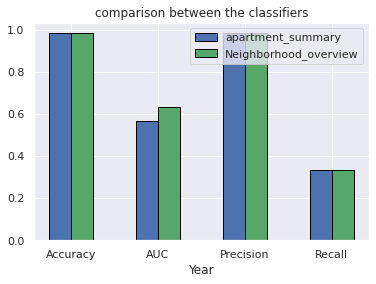

In [ ]:
import plotly.graph_objects as go
metrics_df = pd.DataFrame()

apartment_summary = [res_evaluate_summary["accuracy"],res_evaluate_summary["auc"], res_evaluate_summary["precision"],res_evaluate_summary["recall"]]
Neighborhood_overview = [res_evaluate_neighborhood["accuracy"],res_evaluate_neighborhood["auc"], res_evaluate_neighborhood["precision"],res_evaluate_neighborhood["recall"]]
  
n=4
r = np.arange(n)
width = 0.25
  

plt.bar(r, apartment_summary, color = 'b', width = width, edgecolor = 'black', label='apartment_summary')
plt.bar(r + width, Neighborhood_overview, color = 'g',
        width = width, edgecolor = 'black',
        label='Neighborhood_overview')
  
plt.xlabel("Year")
plt.title("comparison between the classifiers")
  
plt.xticks(r + width/2,['Accuracy','AUC','Precision','Recall'])
plt.legend()

For both classifiers the accuracy rate is high and AUC is low, which makes sense- We need to rememer that most of the reviews has a "Good" score, means our data is imbalanced. We can see that the rercall rate is very low, which might also be an outcome of the imbalanced classes we have here. However,since precision is high and recall is low, we can say that models cannot classify the classes well but whenever they do, we can trust the classification.

🪕🪕🪕

Even though accuracy is high and classification predictions can be trusted, both of the models find it difficult to relate the description of a proprty to its actual quality. Therfore, We won't reccomend on going blindly after a property's description!

## Does the price we pay for Airbnb apartment affects our experience? 

We preformed an analysis, trying to find wether the price for a single night affects guests experience (represented by the review score). 
In addition, we explore the effect of the cleaning fee on guests experience (presented by the review score for cleanliness)

We can see below, a positive corroletion between price and review score.





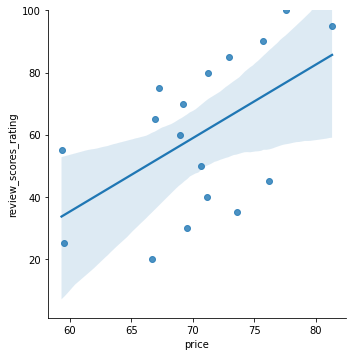

In [ ]:
# data cleaning of abnormal values
price_sf = sf_airbnb.filter_by(filter(lambda x : x != None and x >= 0 and x <= 150 , sf_airbnb['price']),"price")
score_vs_price_sf = price_sf.filter_by(filter(lambda x : x != None and x >= 0 and x <= 100 , price_sf['review_scores_rating']),"review_scores_rating")

# binning rating score 
score_vs_price_sf['review_scores_rating'] = score_vs_price_sf['review_scores_rating'].apply(lambda x: (x//5)*5)

#calculate avg price per review score
score_vs_price_df=score_vs_price_sf.select_columns(['review_scores_rating','price'])\
                          .groupby(['review_scores_rating'], {'price': agg.MEAN('price')})\
                          .sort(['review_scores_rating']).to_dataframe()
# graph draw                          
g = sns.lmplot(y="review_scores_rating", x="price", data=score_vs_price_df)
g.set(ylim=(1, 100))
g

⚡ As presented above, we can see price per night positive correlate with satisfaction from apartment. The conclusion is that more expensive apartment will make you satisfied and happier. 

We can see below, a positive corroletion between cleaning fee and review scores cleanliness.

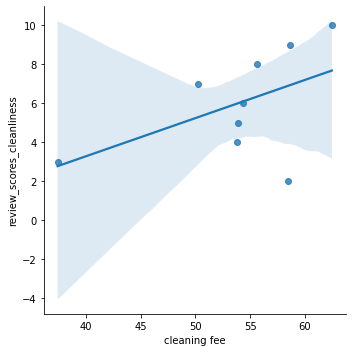

In [ ]:
cleaning_vs_price_sf = sf_airbnb.filter_by(filter(lambda x : x != None and x >= 0 , sf_airbnb['cleaning_fee']),"cleaning_fee")
cleaning_vs_price_sf = cleaning_vs_price_sf.filter_by(filter(lambda x : x != None and x >= 0 , cleaning_vs_price_sf['review_scores_cleanliness']),"review_scores_cleanliness")

cleaning_vs_price_df=cleaning_vs_price_sf.select_columns(['review_scores_cleanliness','cleaning_fee'])\
                          .groupby(['review_scores_cleanliness'], {'cleaning fee': agg.MEAN('cleaning_fee')})\
                          .sort(['review_scores_cleanliness']).to_dataframe()
sns.lmplot(y="review_scores_cleanliness", x="cleaning fee", data=cleaning_vs_price_df)

⚡ As presented above, we can see clearly that cleaning fee affects the satisfaction from the cleaning. The bottom line is that you should bring a not very cheap cleaning company to clean the rooms, for keeping customers more satisfied from cleanliness.